Google Stock Price Prediction using **Recurrent Neural Network (RNN)**

In [ ]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 


In [ ]:
#importing dataset
df = pd.read_csv('trainset.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,652.704082,657.475653,647.433700,652.657015,652.657015,2.414928e+06
std,175.630574,176.627416,174.732814,175.820993,175.820993,1.672160e+06
min,350.053253,350.391052,345.512787,349.164032,349.164032,7.900000e+03
25%,528.287079,532.615204,524.232483,528.429413,528.429413,1.336900e+06
50%,600.002563,603.236511,594.453674,598.005554,598.005554,1.842300e+06
75%,774.015015,779.120025,768.662506,772.720001,772.720001,3.090850e+06
max,1075.199951,1078.489990,1063.550049,1077.140015,1077.140015,2.328310e+07


In [ ]:
training_set = df.iloc[:,1:2].values

In [ ]:
training_set.shape

(1259, 1)

# Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
training_set_scaled

array([[0.01011148],
       [0.01388614],
       [0.01690727],
       ...,
       [0.97543954],
       [0.9674549 ],
       [0.96072522]])

In [ ]:
x_train=[]
y_train=[]
for i in range(60,1258):
    x_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])

x_train , y_train = np.array(x_train),np.array(y_train)    

In [ ]:
x_train.shape

(1198, 60)

In [ ]:
y_train.shape

(1198,)

# Reshaping

In [ ]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [ ]:
x_train.shape

(1198, 60, 1)

# Creating RNN model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
# Initializing  the RNN
model_reg = Sequential()

In [ ]:
# Adding First Layer
model_reg.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model_reg.add(Dropout(0.2))

In [ ]:
# Adding Second LSTM Layer
model_reg.add(LSTM(units=50, return_sequences= True))
model_reg.add(Dropout(0.2))

In [ ]:
# Adding Third LSTM Layer
model_reg.add(LSTM(units=50, return_sequences= True))
model_reg.add(Dropout(0.2))

In [ ]:
# Adding Fourth LSTM Layer
model_reg.add(LSTM(units=50))
model_reg.add(Dropout(0.2))

In [ ]:
# Adding Output Layer
model_reg.add(Dense(units=1))

# Model Compilation


In [ ]:
model_reg.compile(optimizer='adam',loss='mse',metrics=['mse','mae'])

# Fitting the RNN to Training Set 

In [ ]:
model_reg.fit(x_train,y_train,validation_split=0.33,batch_size=32,epochs=100)

Epoch 1/100
26/26 [==============================] - 12s 187ms/step - loss: 0.0159 - mse: 0.0159 - mae: 0.0904 - val_loss: 0.0524 - val_mse: 0.0524 - val_mae: 0.2179
Epoch 2/100
26/26 [==============================] - 3s 125ms/step - loss: 0.0045 - mse: 0.0045 - mae: 0.0517 - val_loss: 0.0044 - val_mse: 0.0044 - val_mae: 0.0550
Epoch 3/100
26/26 [==============================] - 3s 123ms/step - loss: 0.0026 - mse: 0.0026 - mae: 0.0384 - val_loss: 0.0040 - val_mse: 0.0040 - val_mae: 0.0528
Epoch 4/100
26/26 [==============================] - 3s 122ms/step - loss: 0.0025 - mse: 0.0025 - mae: 0.0374 - val_loss: 0.0055 - val_mse: 0.0055 - val_mae: 0.0636
Epoch 5/100
26/26 [==============================] - 3s 123ms/step - loss: 0.0022 - mse: 0.0022 - mae: 0.0352 - val_loss: 0.0015 - val_mse: 0.0015 - val_mae: 0.0302
Epoch 6/100
26/26 [==============================] - 3s 122ms/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0362 - val_loss: 0.0112 - val_mse: 0.0112 - val_mae: 0.0962
Epoch 7/1

In [ ]:
model_reg.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

# Stock Price for 2018

In [ ]:
dataset_test = pd.read_csv('testset.csv')

In [ ]:
dataset_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,1048.339966,1066.939941,1045.229980,1065.000000,1065.000000,1237600
1,2018-01-03,1064.310059,1086.290039,1063.209961,1082.479980,1082.479980,1430200
2,2018-01-04,1088.000000,1093.569946,1084.001953,1086.400024,1086.400024,1004600
3,2018-01-05,1094.000000,1104.250000,1092.000000,1102.229980,1102.229980,1279100
4,2018-01-08,1102.229980,1111.270020,1101.619995,1106.939941,1106.939941,1047600


In [ ]:
real_stock_price = dataset_test.iloc[:,1:2].values

In [ ]:
real_stock_price

array([[1048.339966],
       [1064.310059],
       [1088.      ],
       [1094.      ],
       [1102.22998 ],
       [1109.400024],
       [1097.099976],
       [1106.300049],
       [1102.410034],
       [1132.51001 ],
       [1126.219971],
       [1131.410034],
       [1131.829956],
       [1137.48999 ],
       [1159.849976],
       [1177.329956],
       [1172.530029],
       [1175.079956],
       [1176.47998 ],
       [1167.829956],
       [1170.569946],
       [1162.609985],
       [1122.      ],
       [1090.599976],
       [1027.180054],
       [1081.540039],
       [1055.410034],
       [1017.25    ],
       [1048.      ],
       [1045.      ],
       [1048.949951],
       [1079.069946],
       [1088.410034],
       [1090.569946],
       [1106.469971],
       [1116.189941],
       [1112.640015],
       [1127.800049],
       [1141.23999 ],
       [1123.030029],
       [1107.869995],
       [1053.079956],
       [1075.140015],
       [1099.219971],
       [1089.189941],
       [11

In [ ]:
dataset_total = pd.concat((df['Open'],dataset_test['Open']),axis=0)


In [ ]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60 : ].values

In [ ]:
inputs 

array([ 955.48999 ,  966.700012,  980.      ,  980.      ,  973.719971,
        987.450012,  992.      ,  992.099976,  990.289978,  991.77002 ,
        986.      ,  989.440002,  989.52002 ,  970.      ,  968.369995,
        980.      , 1009.190002, 1014.      , 1015.219971, 1017.210022,
       1021.76001 , 1022.109985, 1028.98999 , 1027.27002 , 1030.52002 ,
       1033.98999 , 1026.459961, 1023.419983, 1022.590027, 1019.210022,
       1022.52002 , 1034.01001 , 1020.26001 , 1023.309998, 1035.      ,
       1035.869995, 1040.      , 1055.089966, 1042.680054, 1022.369995,
       1015.799988, 1012.659973,  995.940002, 1001.5     , 1020.429993,
       1037.48999 , 1035.5     , 1039.630005, 1046.119995, 1045.      ,
       1054.609985, 1066.079956, 1075.199951, 1071.780029, 1064.949951,
       1061.109985, 1058.069946, 1057.390015, 1051.599976, 1046.719971,
       1048.339966, 1064.310059, 1088.      , 1094.      , 1102.22998 ,
       1109.400024, 1097.099976, 1106.300049, 1102.410034, 1132.

In [ ]:
inputs = inputs.reshape(-1,1)


In [ ]:
inputs

array([[ 955.48999 ],
       [ 966.700012],
       [ 980.      ],
       [ 980.      ],
       [ 973.719971],
       [ 987.450012],
       [ 992.      ],
       [ 992.099976],
       [ 990.289978],
       [ 991.77002 ],
       [ 986.      ],
       [ 989.440002],
       [ 989.52002 ],
       [ 970.      ],
       [ 968.369995],
       [ 980.      ],
       [1009.190002],
       [1014.      ],
       [1015.219971],
       [1017.210022],
       [1021.76001 ],
       [1022.109985],
       [1028.98999 ],
       [1027.27002 ],
       [1030.52002 ],
       [1033.98999 ],
       [1026.459961],
       [1023.419983],
       [1022.590027],
       [1019.210022],
       [1022.52002 ],
       [1034.01001 ],
       [1020.26001 ],
       [1023.309998],
       [1035.      ],
       [1035.869995],
       [1040.      ],
       [1055.089966],
       [1042.680054],
       [1022.369995],
       [1015.799988],
       [1012.659973],
       [ 995.940002],
       [1001.5     ],
       [1020.429993],
       [10

In [ ]:
inputs = sc.transform(inputs)
inputs.shape

(185, 1)

In [ ]:
x_test = []
for i in range(60,185):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
x_test.shape

(125, 60)

In [ ]:
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))
x_test.shape

(125, 60, 1)

In [ ]:
predicted_stock_price = model_reg.predict(x_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)
predicted_stock_price

array([[1025.0067 ],
       [1023.23206],
       [1024.9502 ],
       [1032.4767 ],
       [1042.7831 ],
       [1052.8564 ],
       [1061.1045 ],
       [1064.3494 ],
       [1065.2913 ],
       [1064.8497 ],
       [1068.9211 ],
       [1074.6057 ],
       [1080.2291 ],
       [1084.4478 ],
       [1087.8542 ],
       [1093.9674 ],
       [1103.6422 ],
       [1112.268  ],
       [1118.0894 ],
       [1121.271  ],
       [1121.2407 ],
       [1120.194  ],
       [1118.15   ],
       [1109.7875 ],
       [1094.5292 ],
       [1069.4333 ],
       [1052.1162 ],
       [1042.0658 ],
       [1031.8567 ],
       [1026.4551 ],
       [1025.1329 ],
       [1026.3438 ],
       [1032.5964 ],
       [1041.7769 ],
       [1049.9685 ],
       [1057.3186 ],
       [1064.0503 ],
       [1068.3746 ],
       [1072.6471 ],
       [1078.6641 ],
       [1081.7578 ],
       [1079.6486 ],
       [1066.6736 ],
       [1053.5718 ],
       [1049.21   ],
       [1050.7319 ],
       [1058.4904 ],
       [1071.

In [ ]:
len(dataset_total)

1384

# Visualization

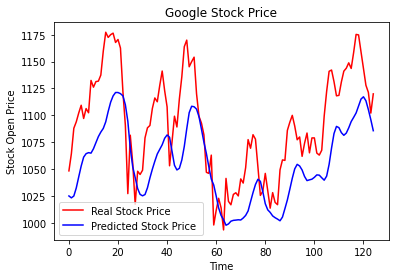

In [ ]:
plt.plot(real_stock_price, color = 'red',label = 'Real Stock Price ')
plt.plot(predicted_stock_price,color='blue', label ='Predicted Stock Price ')
plt.title('Google Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Open Price')
plt.legend()
plt.show()